# AMS 528 Homework 1 
**submitted by Jiaxi Zhao on 28th Feb, 2021**

In [3]:
import numpy as np
import numpy.linalg as alg
import sympy as sp
from sympy import *
from matplotlib import pyplot as plt 
%matplotlib inline

## Diffusion equation with Dirichlet BC
Consider the following IBVP for the diffusion equation
\begin{equation}
    \begin{aligned}
        v_t & = v_{xx},    \\
        v(0; t) & = v(1; t) = 0     \\ 
        v(x; 0) & = \sin(3\pi x).
    \end{aligned}
\end{equation}
The exact solution is
\begin{equation}
    v(x; t) = \exp(-9\pi^2 t) \sin(3\pi x).
\end{equation}
We use the FTCS scheme and obtain numerical solutions at time $t = 0.02$ using the number of numerical points N and time steps as in the tables below. The numerical scheme is given by 
\begin{equation}
    \frac{v_k^{n + 1} - v_k^n}{\Delta t} = \frac{v_{k + 1}^n + v_{k - 1}^n - 2v_k^n}{( \Delta x )^2},
\end{equation}
which can be also written in the following explicit form
\begin{equation}
    v_k^{n + 1} = v_k^n + \frac{\Delta t}{( \Delta x )^2}(v_{k + 1}^n + v_{k - 1}^n - 2v_k^n).
\end{equation}

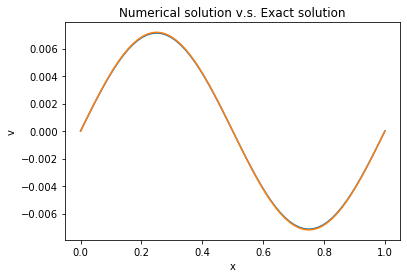

[4.025680751351688e-05, 5.693172316354085e-05]

In [15]:
def Diffusion_FTCS(N, R = 2, plot = False):
    x = np.linspace(0, 1, N + 1)
    v = np.sin(2 * np.pi * x)
    dx = 1 / N
    dt = dx ** 2 / R
    T  = 1 / 8
    for t in range(int(T / dt)):
        v[1:N] += dt / dx ** 2 * (v[:N - 1] + v[2:] - 2 * v[1:N])
    v_truth = np.exp(-4 * (np.pi ** 2) * T) * np.sin(2 * np.pi * x)
    error_inf = np.max(v_truth - v)
    error_l2 = alg.norm(v_truth - v) * np.sqrt(dx)

    if plot:
        fig = plt.figure()
        ax  = fig.add_subplot(111)
        ax.plot(x, v, label = 'Numerical solution')
        ax.plot(x, v_truth, label = 'Exact solution')
        ax.set_xlabel('x')
        ax.set_ylabel('v')
        ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
        plt.show()
    return [error_l2, error_inf]
    
Diffusion_FTCS(64, plot = True)

In [16]:
prev_dx = 1
prev_err_l2 = 1
prev_err_inf = 1

for i in range(5,11):
    N = np.power(2, i)
    [error_l2, error_inf] = Diffusion_FTCS(N)
    dx = 1 / N
    R_l2 = np.log(error_l2/prev_err_l2) / np.log(dx/prev_dx)
    R_inf = np.log(error_inf/prev_err_inf) / np.log(dx/prev_dx)
    
    
    #print('<td>',format(error_l2,'.2e'),'</td>')
    #print('<td>',format(R_l2,'.2e'),'</td>')
    #print('<td>',format(error_inf,'.2e'),'</td>')
    #print('<td>',format(R_inf,'.2e'),'</td>')
    print([error_l2, error_inf, R_l2, R_inf])
    prev_dx = dx
    prev_err_l2 = error_l2
    prev_err_inf = error_inf

[0.000160347392160823, 0.0002267654566850989, 2.521302297822818, 2.4213022978226832]
[4.025680751351688e-05, 5.693172316354085e-05, 1.9938962186034295, 1.9938962186020197]
[1.0074756515008875e-05, 1.424785730123456e-05, 1.9984877943515553, 1.998487794343278]
[2.5193477376582628e-06, 3.5628957390145682e-06, 1.9996228007721093, 1.9996228007483428]
[6.298780809507753e-07, 8.907821247936681e-07, 1.9999057534394107, 1.9999057533576665]
[1.574720916050572e-07, 2.2269916768666298e-07, 1.9999764419892196, 1.9999764418230754]


<table border="1" align="center"><tbody>
    <tr>
        <th>N</th>
        <th>$l_{2, \Delta x}$ error</th>
        <th>Convergence order</th>
        <th>$l_{\infty}$ error</th>
        <th>Convergence order</th>
    </tr>
    <tr>
        <td>$32$</td>
        <td> 1.61e-06 </td>
        <td> NA </td>
        <td> 2.27e-06 </td>
        <td> NA </td>
    </tr>
    <tr>
        <td>$64$</td>
        <td> 4.21e-07 </td>
        <td> 1.94e+00 </td>
        <td> 5.95e-07 </td>
        <td> 1.93e+00 </td>
    </tr>
    <tr>
        <td>$128$</td>
        <td> 1.06e-07 </td>
        <td> 1.98e+00 </td>
        <td> 1.51e-07 </td>
        <td> 1.98e+00 </td>
    </tr>
    <tr>
        <td>$256$</td>
        <td> 2.67e-08 </td>
        <td> 2.00e+00 </td>
        <td> 3.77e-08 </td>
        <td> 2.00e+00 </td>
    </tr>
    <tr>
        <td>$512$</td>
        <td> 6.68e-09 </td>
        <td> 2.00e+00 </td>
        <td> 9.44e-09 </td>
        <td> 2.00e+00 </td>
    </tr>
    <tr>
        <td>$1024$</td>
        <td> 1.67e-09 </td>
        <td> 2.00e+00 </td>
        <td> 2.36e-09 </td>
        <td> 2.00e+00 </td>
    </tr>
</table> 

In [18]:
prev_dx = 1
prev_err_l2 = 1
prev_err_inf = 1

for i in range(5,11):
    N = np.power(2, i)
    [error_l2, error_inf] = Diffusion_FTCS(N, R = 6)
    dx = 1 / N
    R_l2 = np.log(error_l2/prev_err_l2) / np.log(dx/prev_dx)
    R_inf = np.log(error_inf/prev_err_inf) / np.log(dx/prev_dx)
    
    
    #print('<td>',format(error_l2,'.2e'),'</td>')
    #print('<td>',format(R_l2,'.2e'),'</td>')
    #print('<td>',format(error_inf,'.2e'),'</td>')
    #print('<td>',format(R_inf,'.2e'),'</td>')
    print([error_l2, error_inf, R_l2, R_inf])
    prev_dx = dx
    prev_err_l2 = error_l2
    prev_err_inf = error_inf

[6.931403924545951e-08, 9.802485440978809e-08, 4.756455433155507, 4.65645543302011]
[4.32092908660048e-09, 6.110716578577868e-09, 4.0037341340339925, 4.003734120013014]
[2.6988375617863314e-10, 3.8167334657362995e-10, 4.0009315028826355, 4.00093122153107]
[1.6865063422576996e-11, 2.3850901288702264e-11, 4.000228497317057, 4.000222752639323]
[1.054073101918757e-12, 1.4907831913379965e-12, 3.9999909146235493, 3.999901421558771]
[6.584149955687369e-14, 9.323011113115953e-14, 4.0008339199086445, 3.9991306609024586]


<table border="1" align="center"><tbody>
    <tr>
        <th>N</th>
        <th>$l_{2, \Delta x}$ error</th>
        <th>Convergence order</th>
        <th>$l_{\infty}$ error</th>
        <th>Convergence order</th>
    </tr>
    <tr>
        <td>$32$</td>
        <td> 1.66e-09 </td>
        <td> NA </td>
        <td> 2.35e-09 </td>
        <td> NA </td>
    </tr>
    <tr>
        <td>$64$</td>
        <td> 1.03e-10 </td>
        <td> 4.01e+00 </td>
        <td> 1.46e-10 </td>
        <td> 4.01e+00 </td>
    </tr>
    <tr>
        <td>$128$</td>
        <td> 6.44e-12 </td>
        <td> 4.00e+00 </td>
        <td> 9.11e-12 </td>
        <td> 4.00e+00 </td>
    </tr>
    <tr>
        <td>$256$</td>
        <td> 4.02e-13 </td>
        <td> 4.00e+00 </td>
        <td> 5.69e-13 </td>
        <td> 4.00e+00 </td>
    </tr>
    <tr>
        <td>$512$</td>
        <td> 2.52e-14 </td>
        <td> 4.00e+00 </td>
        <td> 3.55e-14 </td>
        <td> 4.00e+00 </td>
    </tr>
    <tr>
        <td>$1024$</td>
        <td> 1.63e-15 </td>
        <td> 3.95e+00 </td>
        <td> 2.14e-15 </td>
        <td> 4.05e+00 </td>
    </tr>
</table>

\begin{remark}
    One very concealed bug for the implementation is that the simulation time $T$ may not be a integar multiple of the time step $\Delta t$. Meanwhile, we find that using $\Delta t = \frac{\Delta x^2}{2}$ provides us with a second order scheme while using $\Delta t = \frac{\Delta x^2}{2}$ provides us with a fourth order scheme. This order can be calculated as follows
    \begin{equation}
        \begin{aligned}
                u_k^{n + 1} - u_k^n = & \ u_t \Delta t + \frac{1}{2}u_{tt} \Delta t^2 + O\left(\Delta t^3 \right) \\
                = & \ \frac{1}{6} u_t \Delta x^2 + \frac{1}{72}u_{tt} \Delta t^2 + O\left(\Delta t^3\right)    \\
                \frac{\Delta t}{\Delta x^2} \left( u_{k + 1}^{n} + u_{k - 1}^n - 2u_k^n  \right) = & \ \frac{1}{6} \left( u_{k + 1}^{n} + u_{k - 1}^n - 2u_k^n  \right)   \\
                = & \ \frac{1}{6} u_{xx}  \Delta x^2 + \frac{1}{72} u_{xxxx}\Delta x^4 + O\left( \Delta x^6\right).
        \end{aligned}
    \end{equation}
    Consequently, the $\Delta t^2, \Delta x^4$ terms also cancel out, with the smallest order terms given by $\Delta t^3, \Delta x^6$. The scheme is of order $4$.
\end{remark}


## Diffusion equation with Neuman BC
Now, consider the following IBVP for the diffusion equation
\begin{equation}
    \begin{aligned}
        v_t & = v_{xx},    \\
        v_x(0; t) & = 3\pi \exp(-9\pi^2 t), \quad \ \ \ \ v(1; t) = 0     \\ 
        v(x; 0) & = \sin(3\pi x).
    \end{aligned}
\end{equation}
This time, the right BC is still Dirichlet while the left BC is given by Neuman.
### A. Vertex grid, Centered 2nd order differencing
For this version, the left boundary condition is given by
\begin{equation}
    \frac{u_1^n - u_{-1}^n}{2\Delta x} = 0 \Longrightarrow u_1^n = u_{-1}^n, u_0^{n + 1} = u_0^n + \frac{\Delta t}{\Delta x^2} \left( u_1^n + u_{-1}^n - 2u_0^n \right) = u_0^n + \frac{2\Delta t}{\Delta x^2} \left( u_1^n - u_0^n \right).
\end{equation}
Notice that, for this version, the left boundary is at the point $u_0^n$.

[0.009746233722756223, 0.0028550388441597185]


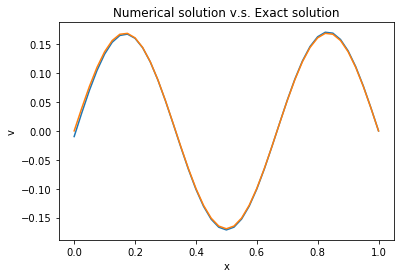

In [22]:
def Neuman_FTCS(N, BCchoice = 'A', plot = False):
    x = np.linspace(0, 1, N + 1)
    v = np.sin(3 * np.pi * x)
    dx = 1 / N
    dt = dx ** 2 / 2
    T  = 1 / 8
    for t in range(int(T / dt)):
        v[1:N] += dt / dx ** 2 * (v[:N - 1] + v[2:] - 2 * v[1:N])
        if BCchoice == 'A':
            v[0] = v[1] - dx * 3 * np.pi * np.exp(- 9 * np.pi ** 2 * dt * (t + 1)) 
        elif BCchoice == 'B':
            
        else:
                
    v_truth = np.exp(-9 * np.pi ** 2 * T) * np.sin(3 * np.pi * x)
    error_inf = np.max(v_truth - v)
    error_l2 = alg.norm(v_truth - v) * np.sqrt(dx)

    fig = plt.figure()
    ax  = fig.add_subplot(111)
    ax.plot(x, v, label = 'Numerical solution')
    ax.plot(x, v_truth, label = 'Exact solution')
    ax.set_xlabel('x')
    ax.set_ylabel('v')
    ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
    plt.show()

### B. Vertex grid, One-sided 1st order differencing

[0.009222058107496213, 0.0026722258214861012]


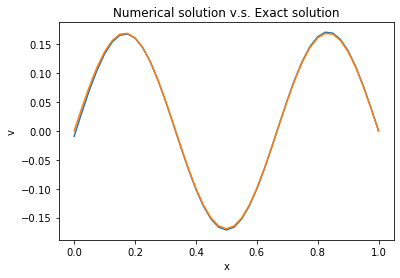

In [23]:
N = 40
x = np.linspace(0, 1, N + 1)
v = np.sin(3 * np.pi * x)
dx = 1 / N
dt = dx ** 2 / 2
T  = 0.02
for t in range(int(T / dt)):
    v[1:N] += dt / dx ** 2 * (v[:N - 1] + v[2:] - 2 * v[1:N])
    v[0] = (v[1] - dx * 3 * np.pi * np.exp(- 9 * np.pi ** 2 * dt * (t + 1))+ v[0]) / 2 
v_truth = np.exp(-9 * np.pi ** 2 * T) * np.sin(3 * np.pi * x)
error_inf = np.max(v_truth - v)
error_l2 = alg.norm(v_truth - v) * np.sqrt(dx)
print([error_inf, error_l2])

fig = plt.figure()
ax  = fig.add_subplot(111)
ax.plot(x, v, label = 'Numerical solution')
ax.plot(x, v_truth, label = 'Exact solution')
ax.set_xlabel('x')
ax.set_ylabel('v')
ax.set_title('Numerical solution v.s. Exact solution',fontsize=12)
plt.show()